# Preprocessing and Feature Engineering

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [55]:
train = pd.read_csv('../datasets/cleaned_train.csv')
test = pd.read_csv('../datasets/cleaned_test.csv')

In [56]:
train.shape

(2051, 74)

In [57]:
test.shape

(878, 73)

### list of features I'm interested in based off data dictionary

In [58]:
features = ['lot_area', 'overall_qual', 'overall_cond', 'year_built', 'year_remod/add', 
            'exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'heating_qc', 'kitchen_qual', 'garage_area', 
           'totrms_abvgrd', 'full_bath', '1st_flr_sf', 'gr_liv_area', 'garage_cars', 'lot_shape', 'land_contour', 
            'neighborhood', 'bldg_type', 'house_style', 'foundation']

# Removing Outliers

In [59]:
int_describe = train[features].dtypes[lambda x: x == 'int64']
train[int_describe.index].describe()

,lot_area,overall_qual,overall_cond,year_built,year_remod/add,totrms_abvgrd,full_bath,1st_flr_sf,gr_liv_area
count,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,10065.208191,6.112140,5.562165,1971.708922,1984.190151,6.435885,1.577279,1164.488055,1499.330083
std,6742.488909,1.426271,1.104497,30.177889,21.036250,1.560225,0.549279,396.446923,500.447829
min,1300.000000,1.000000,1.000000,1872.000000,1950.000000,2.000000,0.000000,334.000000,334.000000
25%,7500.000000,5.000000,5.000000,1953.500000,1964.500000,5.000000,1.000000,879.500000,1129.000000
50%,9430.000000,6.000000,5.000000,1974.000000,1993.000000,6.000000,2.000000,1093.000000,1444.000000
75%,11513.500000,7.000000,6.000000,2001.000000,2004.000000,7.000000,2.000000,1405.000000,1728.500000
max,159000.000000,10.000000,9.000000,2010.000000,2010.000000,15.000000,4.000000,5095.000000,5642.000000


In [60]:
float_describe = train[features].dtypes[lambda x: x == 'float64']
train[float_describe.index].describe()

,garage_area,garage_cars
count,2051.000000,2051.000000
mean,473.440761,1.775719
std,216.135102,0.765357
min,0.000000,0.000000
25%,319.000000,1.000000
50%,480.000000,2.000000
75%,576.000000,2.000000
max,1418.000000,5.000000


In [61]:
outliers = ['garage_area', 'lot_area', '1st_flr_sf', 'gr_liv_area']

In [62]:
mean_out = train.loc[train['garage_area']<800, 'garage_area'].mean()
train['garage_area'] = np.where(train['garage_area'] >800, mean_out,train['garage_area'])

In [63]:
mean_out = train.loc[train['lot_area']<15000, 'lot_area'].mean()
train['lot_area'] = np.where(train['lot_area'] >15000, mean_out,train['lot_area'])

In [64]:
mean_out = train.loc[train['1st_flr_sf']<3500, '1st_flr_sf'].mean()
train['1st_flr_sf'] = np.where(train['1st_flr_sf'] >3500, mean_out,train['1st_flr_sf'])

In [65]:
mean_out = train.loc[train['gr_liv_area']<3500, 'gr_liv_area'].mean()
train['gr_liv_area'] = np.where(train['gr_liv_area'] >3500, mean_out,train['gr_liv_area'])

### Categorizing what I want to Feature 

In [66]:
# BINARY
binary = ['lot_shape', 'land_contour', 'bldg_type', 'house_style']

In [67]:
# DUMMY
dummy = ['neighborhood', 'foundation']

In [68]:
# ORDINAL
ordinal = ['exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'heating_qc', 'kitchen_qual']

### Changing Columns to binary

In [69]:
# 1 = Regular, 0 = Irregular 
train['lot_shape'] = [1 if i == 'Reg' else 0 for i in train['lot_shape']]

In [70]:
test['lot_shape'] = [1 if i == 'Reg' else 0 for i in test['lot_shape']]

In [71]:
train['lot_shape'].value_counts()

1    1295
0     756
Name: lot_shape, dtype: int64

In [72]:
# 1 = Lvl, 0 = not Lvl 
train['land_contour'] = [1 if i == 'Lvl' else 0 for i in train['land_contour']]

In [73]:
test['land_contour'] = [1 if i == 'Lvl' else 0 for i in test['land_contour']]

In [74]:
train['land_contour'].value_counts()

1    1843
0     208
Name: land_contour, dtype: int64

In [75]:
# 1 = 1Family house, 0 = other building type 
train['bldg_type'] = [1 if i == '1Fam' else 0 for i in train['bldg_type']]

In [76]:
test['bldg_type'] = [1 if i == '1Fam' else 0 for i in test['bldg_type']]

In [77]:
train['bldg_type'].value_counts()

1    1700
0     351
Name: bldg_type, dtype: int64

In [78]:
# 1 = 1Story, 0 = other house style
train['house_style'] = [1 if i == '1Story' else 0 for i in train['house_style']]

In [79]:
test['house_style'] = [1 if i == '1Story' else 0 for i in test['house_style']]

In [80]:
train['house_style'].value_counts()

1    1059
0     992
Name: house_style, dtype: int64

### Changing Ordinal columns to Numerical 

In [81]:
def ordinal_to_num_6(df, df2, col):
    grading = ['No', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
    enc = OrdinalEncoder(categories=[grading])
    df[col] = enc.fit_transform(df[[col]])
    df2[col] = enc.transform(df2[[col]])
    return df[col].value_counts(), df2[col].value_counts()

In [82]:
ordinal_to_num_6(train, test, 'bsmt_qual')

(3.0    887
 4.0    864
 5.0    184
 2.0     60
 0.0     55
 1.0      1
 Name: bsmt_qual, dtype: int64,
 3.0    396
 4.0    355
 5.0     73
 2.0     28
 0.0     25
 1.0      1
 Name: bsmt_qual, dtype: int64)

In [83]:
ordinal_to_num_6(train, test, 'bsmt_cond')

(3.0    1834
 4.0      89
 2.0      65
 0.0      55
 1.0       5
 5.0       3
 Name: bsmt_cond, dtype: int64,
 3.0    781
 2.0     39
 4.0     33
 0.0     25
 Name: bsmt_cond, dtype: int64)

In [84]:
def ordinal_to_num_4(df, df2, col):
    grading = ['Fa', 'TA', 'Gd', 'Ex']
    enc = OrdinalEncoder(categories=[grading])
    df[col] = enc.fit_transform(df[[col]])
    df2[col] = enc.transform(df2[[col]])
    return df[col].value_counts(), df2[col].value_counts()

In [85]:
test['kitchen_qual'] = test['kitchen_qual'].replace('Po', 'Fa')
train['heating_qc'] = train['heating_qc'].replace('Po', 'Fa')

In [86]:
ordinal_to_num_4(train, test, 'kitchen_qual')

(1.0    1047
 2.0     806
 3.0     151
 0.0      47
 Name: kitchen_qual, dtype: int64,
 1.0    447
 2.0    354
 3.0     53
 0.0     24
 Name: kitchen_qual, dtype: int64)

In [87]:
ordinal_to_num_4(train, test, 'exter_qual')

(1.0    1247
 2.0     697
 3.0      81
 0.0      26
 Name: exter_qual, dtype: int64,
 1.0    552
 2.0    292
 3.0     25
 0.0      9
 Name: exter_qual, dtype: int64)

In [88]:
ordinal_to_num_4(train, test, 'heating_qc')

(3.0    1065
 1.0     597
 2.0     319
 0.0      70
 Name: heating_qc, dtype: int64,
 3.0    429
 1.0    267
 2.0    157
 0.0     25
 Name: heating_qc, dtype: int64)

In [89]:
def ordinal_to_num_5(df, df2, col):
    grading = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
    enc = OrdinalEncoder(categories=[grading])
    df[col] = enc.fit_transform(df[[col]])
    df2[col] = enc.transform(df2[[col]])
    return df[col].value_counts(), df2[col].value_counts()

In [90]:
ordinal_to_num_5(train, test, 'exter_cond')

(2.0    1778
 3.0     215
 1.0      49
 4.0       7
 0.0       2
 Name: exter_cond, dtype: int64,
 2.0    770
 3.0     84
 1.0     18
 4.0      5
 0.0      1
 Name: exter_cond, dtype: int64)

### Dummify Columns 

In [91]:
dummy = ['neighborhood', 'foundation']

In [92]:
ohe = OneHotEncoder(
    drop = 'first',
    handle_unknown = 'ignore',
    sparse_output = False
)

In [93]:
ctx = ColumnTransformer(
    transformers = [ 
        ('one_hot', ohe, dummy)
    ], remainder = 'drop',
    verbose_feature_names_out=False
)

In [94]:

ctx.fit(train)

train_enc = ctx.transform(train)

test_enc = ctx.transform(test)

train_enc = pd.DataFrame(train_enc,
                          columns = ctx.get_feature_names_out())

test_enc = pd.DataFrame(test_enc,
                          columns = ctx.get_feature_names_out())

In [95]:
train_enc.shape

(2051, 32)

In [96]:
train.shape

(2051, 74)

In [97]:
# MERGE COLUMNS
train = pd.concat([train, train_enc],
                  axis = 1)

In [98]:
train.shape

(2051, 106)

In [99]:
test = pd.concat([test, test_enc],
                  axis = 1)

### Saleprice has a right skew distribution. We need to normalize our target variable

In [100]:
train['saleprice'] = np.log(train['saleprice'])
train['saleprice'].value_counts()

11.775290    25
11.849398    22
11.884489    20
11.813030    19
11.982929    16
             ..
11.984490     1
12.498429     1
12.484204     1
12.198544     1
12.607366     1
Name: saleprice, Length: 828, dtype: int64

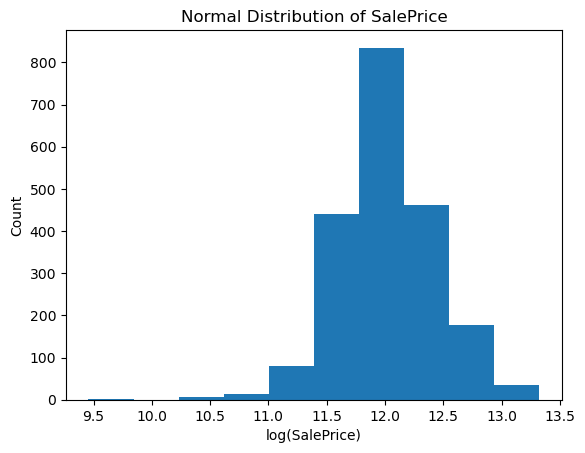

In [101]:
plt.hist(train['saleprice'])
plt.title('Normal Distribution of SalePrice')
plt.xlabel('log(SalePrice)')
plt.ylabel('Count');
plt.savefig('../images/normal_distrib_saleprice.png')

In [102]:
train[features].dtypes

lot_area          float64
overall_qual        int64
overall_cond        int64
year_built          int64
year_remod/add      int64
exter_qual        float64
exter_cond        float64
bsmt_qual         float64
bsmt_cond         float64
heating_qc        float64
kitchen_qual      float64
garage_area       float64
totrms_abvgrd       int64
full_bath           int64
1st_flr_sf        float64
gr_liv_area       float64
garage_cars       float64
lot_shape           int64
land_contour        int64
neighborhood       object
bldg_type           int64
house_style         int64
foundation         object
dtype: object

In [103]:
test.to_csv('../datasets/feat_test.csv', index = False)
train.to_csv('../datasets/feat_train.csv', index = False)